# Problem 2 (survival on the Titanic) The titanic.xls dataset contains information on each of the 1309 passengers of RMS Titanic. The goal is to predict passenger survival. Use the first 1100 rows as the training sample and the remaining rows as the test sample.

In [28]:
import pandas as pd
import numpy as np

df = pd.read_excel('W4_titanic.xlsx')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [29]:
train_size = 1100

X = df.drop('survived', axis=1)
y = df['survived'].copy()

# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [30]:
import numpy as np

# Divide the df into 3 equal sets
df_sets = np.array_split(df, 3)

# Access the individual sets
df_set1 = df_sets[0]
df_set2 = df_sets[1]
df_set3 = df_sets[2]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### (i) Fit a decision tree of maximal depth 𝑑 ∈ {1, 2, 3, 4, 5, 6, 7, 8} with the information gain as the splitting criterion.

In [31]:
from sklearn.tree import DecisionTreeClassifier


# Define the depths
depths = [1, 2, 3, 4, 5, 6, 7, 8]

# Fit decision trees with different depths
trees = []
for depth in depths:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    tree.fit(X_train, y_train)
    trees.append(tree)



### (ii) Plot the decision trees corresponding to 𝑑 = 1 and 𝑑 = 2 (in Python, use sklearn.tree.plot_tree). Interpret the results.

The root node splits on the feature sex_male <= 0.5. 

This is effectively dividing the passengers by gender ('male' and 'female'). The left branch ('female' passengers) leads to a leaf node with very low entropy (0.0), indicating that most passengers in this branch survived (318 out of 413 samples).

The right branch ('male' passengers) leads to a leaf node with high entropy (0.996), indicating a more mixed outcome with a majority not surviving (541 out of 697 samples).


The decision choose the feature body <= inf as the second split. If a passenger has a recorded body number, it means their body was recovered, implying they did not survive. So this lead to the left leaf node ('body' is not NaN) with very low entropy (0.0), indicating that the most passengers in this branch not surviving (). The right ('Body' is NaN) lead to a node with entropy = 0.808, with a majority notsurvived (443 out of 589).


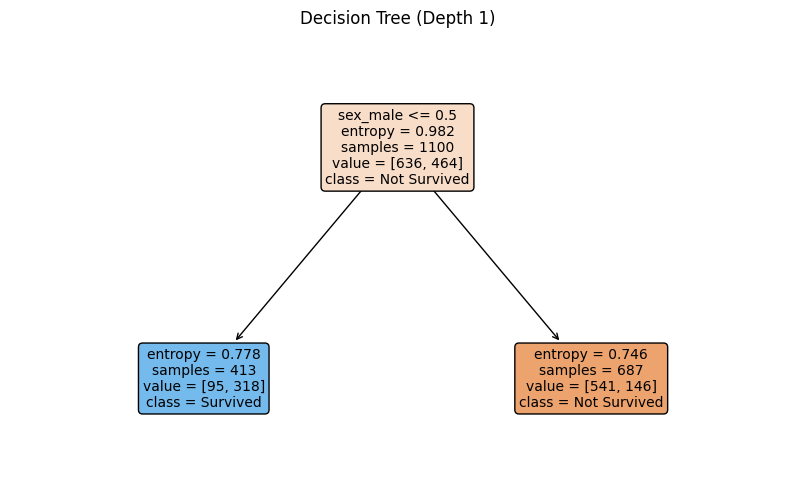

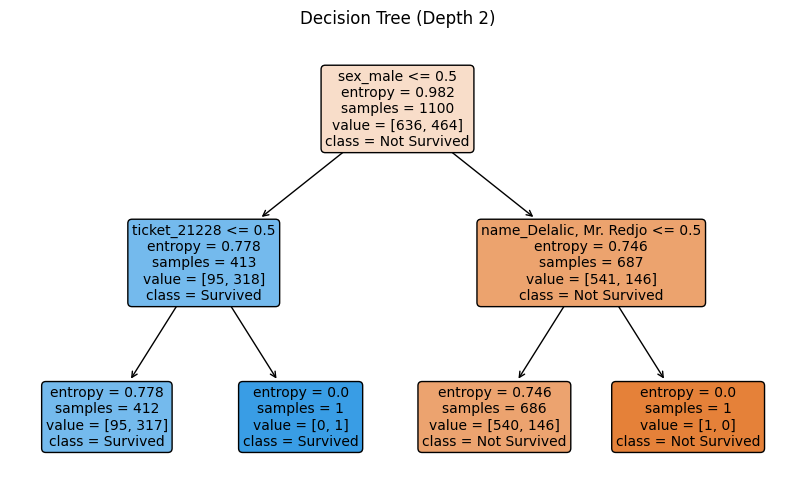

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot decision tree with depth 1
plt.figure(figsize=(10, 6))
tree.plot_tree(trees[0], filled=True, 
               feature_names=X.columns, 
               class_names=['Not Survived', 'Survived'], 
               rounded=True,
               fontsize=10)
plt.title('Decision Tree (Depth 1)')
plt.show()

# Plot decision tree with depth 2
plt.figure(figsize=(10, 6))
tree.plot_tree(trees[1], filled=True, 
               feature_names=X.columns, 
               class_names=['Not Survived', 'Survived'], 
               rounded=True,
               fontsize=10)
plt.title('Decision Tree (Depth 2)')
plt.show()



### (iii) Calculate the test error (misclassiication rate) on the test sample and plot it as a function of depth 𝑑. Does the test error change much? Which value of 𝑑 would you choose.

The test error doesn't change too much, all of them falls in the range of 0.21 to 0.28.

The best d should be 6.

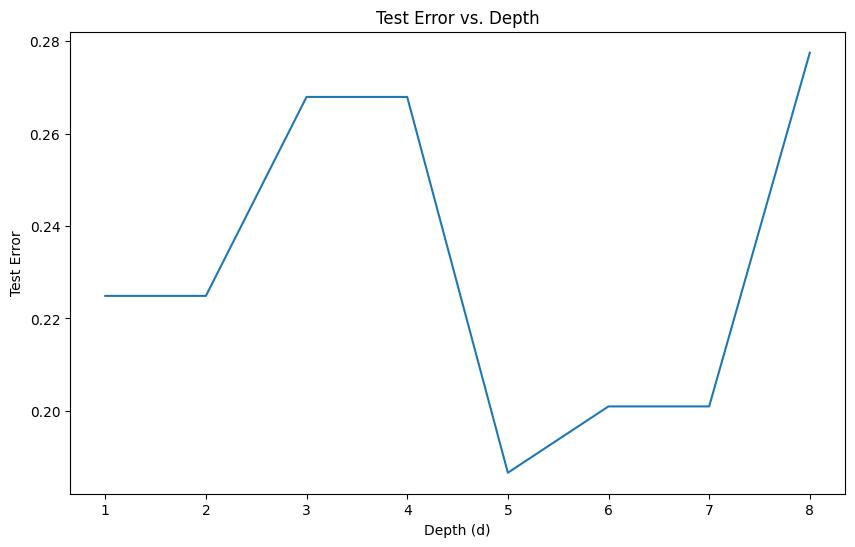

The test errors are [0.22488038277511957, 0.22488038277511957, 0.26794258373205737, 0.26794258373205737, 0.1866028708133971, 0.2009569377990431, 0.2009569377990431, 0.27751196172248804]
The best depth is 5


In [33]:
test_errors = []
for tree in trees:
    test_errors.append(1 - tree.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, test_errors)
plt.xlabel('Depth (d)')
plt.ylabel('Test Error')
plt.title('Test Error vs. Depth')
plt.show()

print('The test errors are', test_errors)
# Find the best depth
best_depth = depths[np.argmin(test_errors)]
print('The best depth is', best_depth)



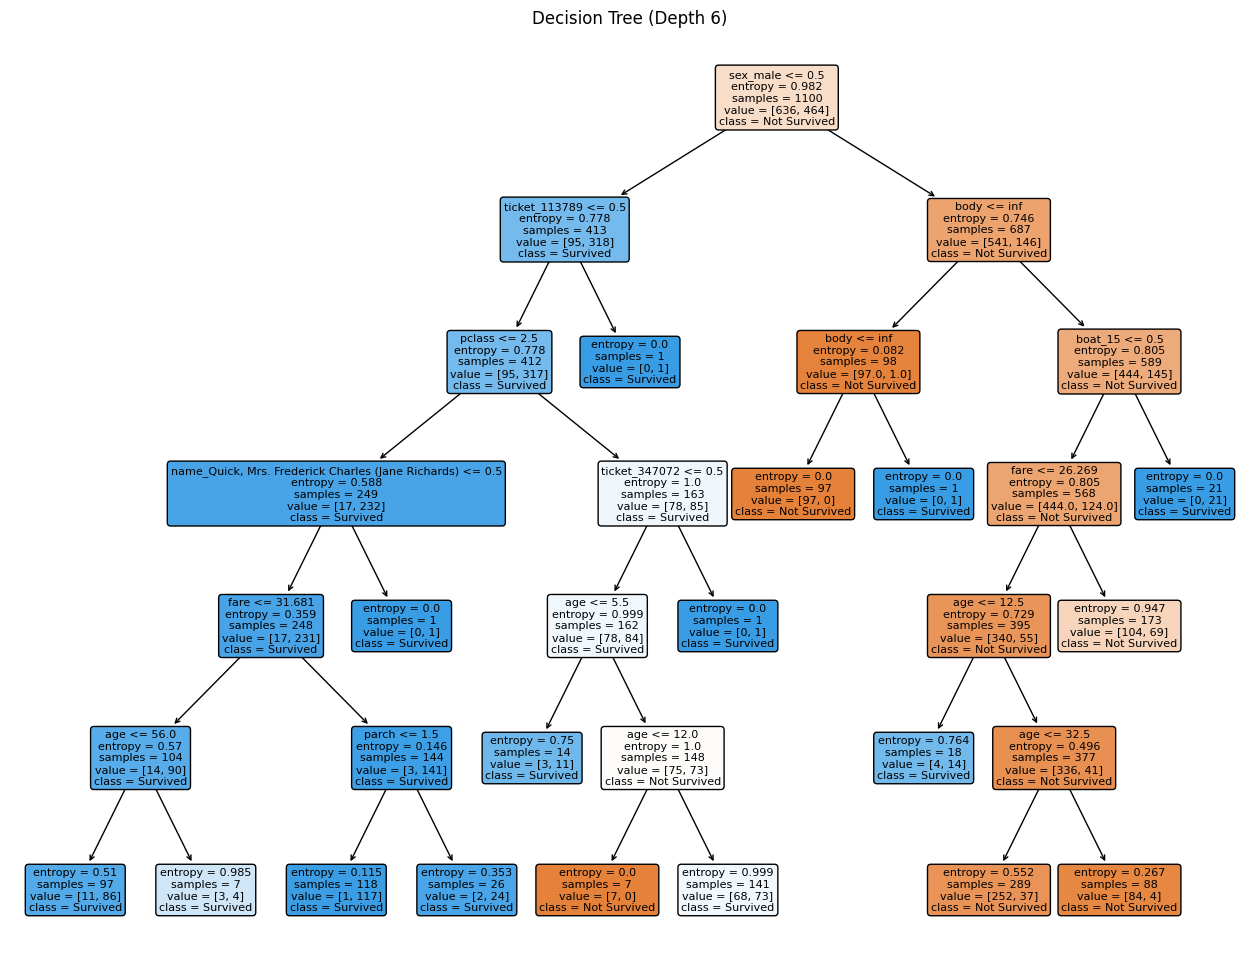

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'trees[5]' is your DecisionTreeClassifier instance and 'X' is your feature matrix
# Adjust the figure size as needed
plt.figure(figsize=(16, 12))

# Correct usage of plot_tree
plot_tree(trees[5], 
          filled=True, 
          feature_names=X.columns, 
          class_names=['Not Survived', 'Survived'], 
          rounded=True, fontsize=8)

plt.title('Decision Tree (Depth 6)')
plt.show()
